# COVID19 Twitter Data Analysis

### Problem Statement

To build a twitter trend analyser which will analyse a set of tweets using NLP and text-processing techniques. The trend analyser will work on a given set of tweets, seeded on COVID19 / CORONA:

A tag cloud depicting what topics / Word were being talked about on Twitter
Which hashtag trended (Hashtags are words or phrases beginning with # eg #COVID)
Which Twitter Handler which dominated conversation on Twitter

### 1 a) Generate a word cloud based on the tweets

##### Step 1: Import required Libraries

In [131]:
import pandas as pd
import re
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from nltk.tokenize import regexp_tokenize
from wordcloud import WordCloud, STOPWORDS

##### Step 2:  Importing the tweets

In [132]:
data = open('tweets_corona.txt', encoding="utf8").read()
tweets = data.split("\n")

##### Step 3: Constructing Word Cloud

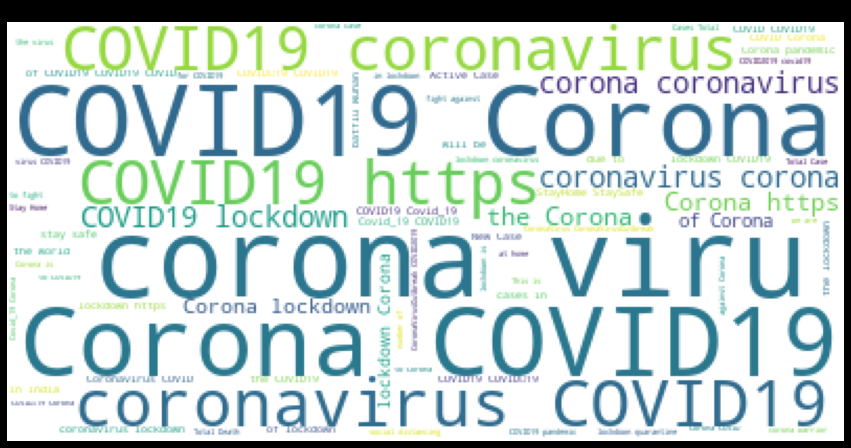

In [133]:
def word_cloud(tweets):
    stopwords = set(STOPWORDS)
    stopwords.update(["https", "co"])
    wordcloud = WordCloud(background_color="white", stopwords=stopwords, random_state = 4000).generate(" ".join([tw for tw in tweets]))
    plt.figure( figsize=(15,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Twitter WordCloud")
word_cloud(tweets)

##### Step 4: Constructing Word Cloud with added stop-words and twitter-Corona Mask

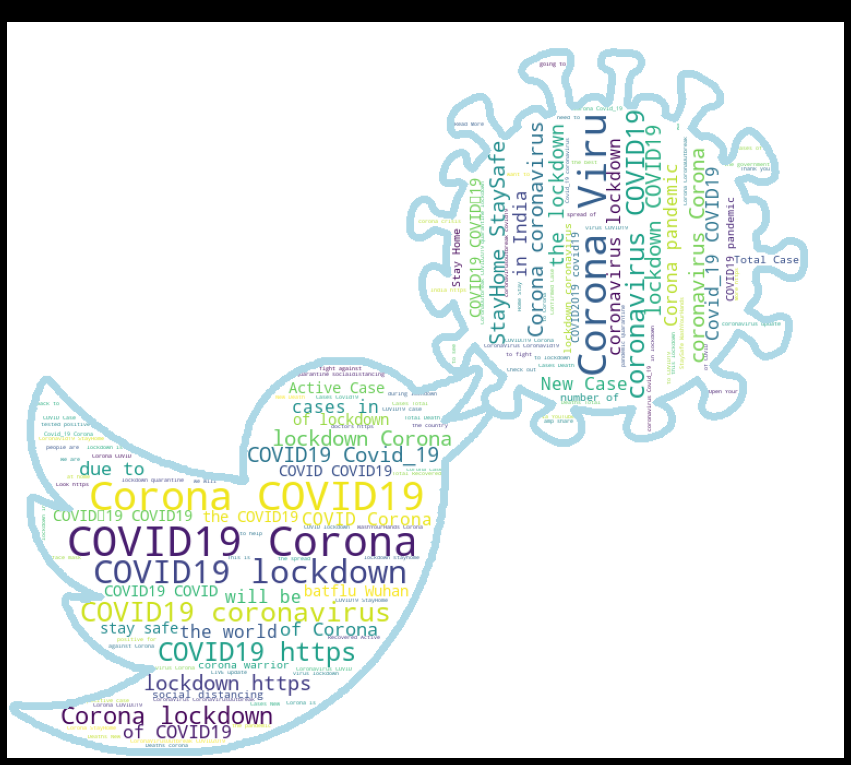

In [134]:
image = np.array(Image.open('./twitter.png'))
def twitter_word_cloud(tweets):
    stopwords = set(STOPWORDS)
    stopwords.update(["https", "co", "corona", "coronavirus", "virus", "covid19", "Covid19", "COVID19", "Corona", "covid", "Covid"])
    wordcloud = WordCloud(background_color="white", mask=image ,stopwords=stopwords, contour_width=10, contour_color='lightblue', random_state = 2016).generate(" ".join([tw for tw in tweets]))
    plt.figure( figsize=(15,15), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Twitter WordCloud")
twitter_word_cloud(tweets)

### 1 b) Show the relative popularity of the hashtags

##### Step 5: Basic data Exploration and Creating a hashtag list from tweets seeded Covid19

In [135]:
def make_frequency_list(wordlist):
    freq = dict()
    
    for word in wordlist:
        if word in freq.keys():
            freq[word] += 1
        else:
            freq[word] = 1
    return freq
hashtag_pattern = r'#\w+'
hashtags = regexp_tokenize(" ".join(tweets), hashtag_pattern)
print("Total number of hashtags in the tweets:", len(hashtags))
hashtag_freq = make_frequency_list(hashtags)
print("Total number of Unique tags:", len(hashtag_freq.keys()))

Total number of hashtags in the tweets: 584666
Total number of Unique tags: 18896


In [136]:
hashtag_pattern = r'@\w+'
hashtags = regexp_tokenize(" ".join(tweets), hashtag_pattern)
print("Total number of Twitter-handles in the tweets:", len(hashtags))
hashtag_freq = make_frequency_list(hashtags)
print("Total number of Unique Twitter-handles:", len(hashtag_freq.keys()))

Total number of Twitter-handles in the tweets: 60126
Total number of Unique Twitter-handles: 6531


In [137]:
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j[1:]) for j in [i for i in raw.split() if i.startswith("#")]]
df = pd.DataFrame({"hashtag": tags})

##### Step 6: Display the count in decending (popular to unpopular)

In [138]:
print(df['hashtag'].value_counts().head(20))

COVID19        49016
Corona         30586
lockdown       23420
coronavirus    21504
corona         19609
covid19        18718
Covid19         8530
Covid_19        6145
COVIDー19        6056
StayHome        4796
Lockdown        4544
COVID           4225
pandemic        3919
CoronaVirus     3875
staysafe        3224
Coronavirus     3072
COVID2019       2953
quarantine      2879
Quarantine      2849
stayhome        2807
Name: hashtag, dtype: int64


### 2: Graphs and charts

##### Step 7: Creating a bar Graph on relative popularity of Tags

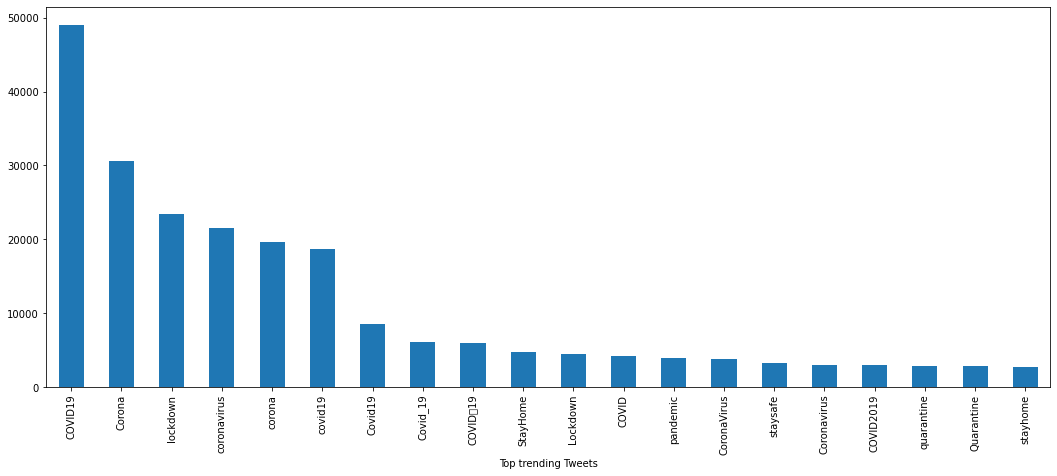

In [139]:
fig, ax = plt.subplots()
plt.xlabel('Top trending Tweets')
df['hashtag'].value_counts().head(20).plot(ax=ax, kind='bar',figsize=(18,7));

##### Step 8: Creating a pie Chart on relative popularity of Tags

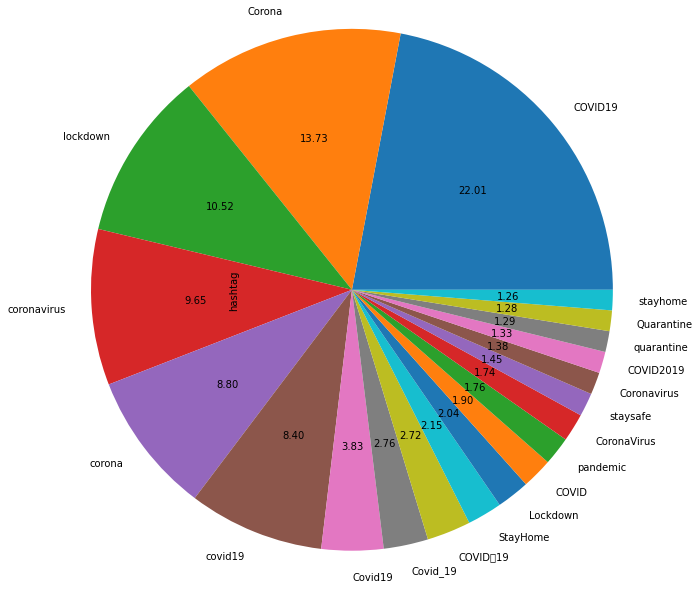

In [141]:
df['hashtag'].value_counts().head(20).plot(kind='pie', autopct='%.2f', radius=3);

### 1 c) Twitter Handler dominated conversation on Twitter

##### Step 9: Optimize the Tweets with the NLP

In [142]:
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j[1:]) for j in [i for i in raw.split() if i.startswith("@") and len(i) != 1 ]]
df = pd.DataFrame({"handlers": tags})

##### Step 10: function to find Twitter Handler had the maximum share of voice

In [143]:
df_count= df['handlers'].value_counts().head(15)
print(df_count)

narendramodi       1455
PMOIndia           1295
realDonaldTrump     837
YouTube             725
WHO                 666
news_pandemic       559
MoHFW_INDIA         446
AmitShah            426
Olacabs             348
BSYBJP              289
ArvindKejriwal      286
PhocusWire          258
Uber_India          258
BorisJohnson        243
CMOMaharashtra      238
Name: handlers, dtype: int64


##### Step 11: Plotting a Pie Chart of Twitter Handler which had the maximum share of voice

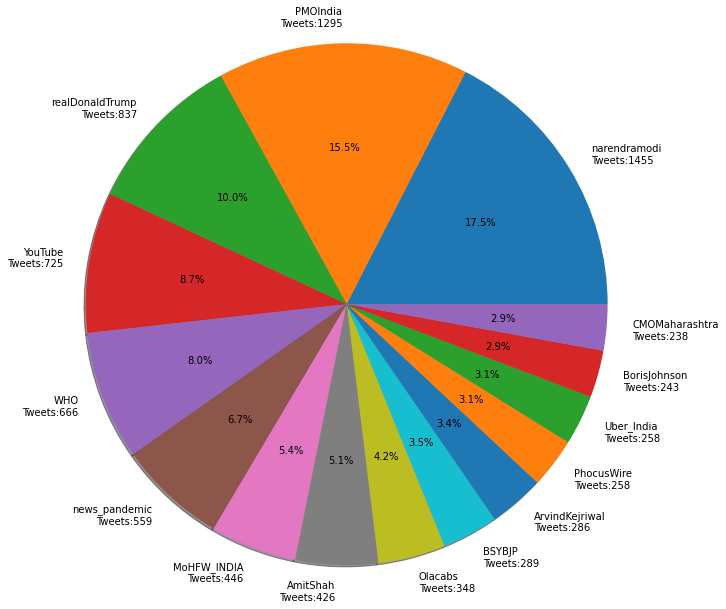

In [144]:
def add(a, b):
    return a+'\nTweets:'+str(b)
plt.pie(df_count, autopct='%1.1f%%', shadow=True,  radius=3, labels=list(map(add,df_count.index.values, df_count)));
plt.show();

## THE END